# Ford GoBike System- Data Exploration
## by Margaret Maina

## Introduction

The Ford GoBike System is a transportation system that is an integral part of the Bay Area- San Fransisco, East Bay and San Jose. Launched by Ford in 2017, the product was designed to be comfortable and easy to ride. The system has [546 stations with more than 7,000 bikes](https://media.ford.com/content/fordmedia/fna/us/en/news/2017/06/27/ford-gobike-launching-in-bay-area-bike-sharing.html) available to its subscribers and other customers that can just walk in to a station and rent a bike.

This dataset was collected from individual rides by users that rented out the Ford GoBikes. I acquired the dataset by downloading it from Udacity's Data Analysis NanoDegree classroom. In this project, I will look at the dataset, wrangle it and visualize it in a way that answers a couple of questions to be used in expansion plan by the company.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import plotly.express as px

%matplotlib inline

### Data Gathering

In [2]:
# Read the csv file into a dataframe from my local machine
df =  pd.read_csv(r'C:\Users\Thee Megg\Downloads\201902-fordgobike-tripdata.csv')

### Data Assessing

In this section I will use programmatic assessment to view the data and gather information about it's structure, columns, features and entries.

In [3]:
# View the shape of the dataset
df.shape

(183412, 16)

> The dataset has 183412 rows and 16 columns

In [4]:
# Use info to view the number of observations in the dataset and their data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Sample five rows to understand some columns
df.sample(5)

duration_sec                start_time                  end_time  \
37165            455  2019-02-23 14:42:49.3080  2019-02-23 14:50:24.7380   
114054           108  2019-02-12 10:14:46.4580  2019-02-12 10:16:35.0840   
76505            473  2019-02-19 08:17:12.5280  2019-02-19 08:25:05.9590   
80490            758  2019-02-18 15:25:28.9260  2019-02-18 15:38:07.5420   
54139            106  2019-02-21 13:46:26.6140  2019-02-21 13:48:13.1110   

        start_station_id                                 start_station_name  \
37165              281.0                          9th St at San Fernando St   
114054              17.0   Embarcadero BART Station (Beale St at Market St)   
76505                4.0                        Cyril Magnin St at Ellis St   
80490               67.0  San Francisco Caltrain Station 2  (Townsend St...   
54139              239.0                      Bancroft Way at Telegraph Ave   

        start_station_latitude  start_station_longitude  end_station_id  \
37165                37.338395              -121.880797           308.0   
114054               37.792251              -122.397086            22.0   
76505                37.785881              -122.408915            67.0   
80490                37.776639              -122.395526           109.0   
54139                37.868813              -122.258764           247.0   

                                         end_station_name  \
37165                                    San Pedro Square   
114054                              Howard St at Beale St   
76505   San Francisco Caltrain Station 2  (Townsend St...   
80490                              17th St at Valencia St   
54139                           Fulton St at Bancroft Way   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
37165              37.336802            -121.894090     6347  Subscriber   
114054             37.789756            -122.394643     5358  Subscriber   
76505              37.776639            -122.395526     4942  Subscriber   
80490              37.763316            -122.421904     3346  Subscriber   
54139              37.867789            -122.265896     5121  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  
37165              1990.0          Male                     Yes  
114054             1984.0          Male                      No  
76505              1988.0          Male                      No  
80490              1985.0          Male                      No  
54139              1999.0          Male                      No

In [6]:
#View the number of unique bike_id values, a feature I found interesting from assessment
df["bike_id"].nunique()

4646

In [7]:
# Look at the statistics for the numerical features in the dataset
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [8]:
# Find the number/ categories of gender
df["member_gender"].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [9]:
#Find the minimum and maximum trip duration lengths in seconds
df["duration_sec"].min(), df["duration_sec"].max()

(61, 85444)

### Data Cleaning

Data Quality and Tidiness Issues
1. Missing data in a few columns.
2. Wrong data type for some columns- year column
3. Convert duration_sec to minutes as the max is too huge

In [10]:
# Make a copy of the data

bike_data = df.copy()
bike_data.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [11]:
#1. Drop rows with missing observations
bike_data.dropna(inplace = True)


In [12]:
bike_data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [13]:
#3. Convert the trip duration from seconds to minutes(1minute = 60 seconds)
bike_data['duration_min'] = bike_data['duration_sec'] / 60
#Drop the duration in seconds column
bike_data.drop('duration_sec' , axis = 1 , inplace = True)

In [14]:
bike_data.head()

start_time                  end_time  start_station_id  \
0  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750              21.0   
2  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460              86.0   
3  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420             375.0   
4  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740               7.0   
5  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600              93.0   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   
5                      4th St at Mission Bay Blvd S               37.770407   

   start_station_longitude  end_station_id  \
0              -122.400811            13.0   
2              -122.426826             3.0   
3              -122.446546            70.0   
4              -122.271738           222.0   
5              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip  duration_min  
0          Male                      No    869.750000  
2          Male                      No   1030.900000  
3         Other                      No    608.166667  
4          Male                     Yes     26.416667  
5          Male                      No     29.883333

In [15]:
bike_data.shape

(174952, 16)

### What is the structure of your dataset?

My original dataset had 183,412 rows of data, and 16 columns. Of these, I dropped the columns with null values, and replaced the duration_sec colummn with duration_min. The resulting dataset has 174592 rows and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in my dataset is trip duration in minutes. In this project, I will analyse factors that affect this trip duration. Other features in my dataset are:
> * start_time -              the time a bike user starts his trip
> * end_time   -              the time a bike user starts his trip
> * start_station_id -        the location from where the bike user gets their bike
> * start_station_name  -     the name of the station from where a biker user gets their bike 
> * start_station_latitude  - longitude coordinates of the start station
> * start_station_longitude - latitude coordinates of the start station
> * end_station_id          - longitude coordinates of the start station
> * end_station_name        - the name of the station from where a biker user gets their bike
> * end_station_latitude    - latittude coordinates of the start station
> * end_station_longitude   - longitude coordinates of the start station 
> * bike_id                 - unique bike reference
> * user_type               - categories of bike users
> * member_birth_year       - the year a bike user was born
> * member_gender           - the gender a bike user was born
> * bike_share_for_all_trip - whether a Bike For All membership was used

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

My dataset has 16 columns that will support my investigation into my feature of interest- duration_min.

## Univariate Exploration

To further assist with my analysis of what affects the duration in minutes, I will visualize the distribution of some of the features in the dataset to answer the following questions;
1. What is the distribution for  trip duration (duration_min)?
2. What is the distribution of gender(member_gender)?
3. What are the 10 most and least popular start stations(start_station_name)?
4. What are the 10 most and least popular end stations(end_station_name)?
5. What is the Distribution of the user type(user_type)?
6. What is the distribution of the ages? 


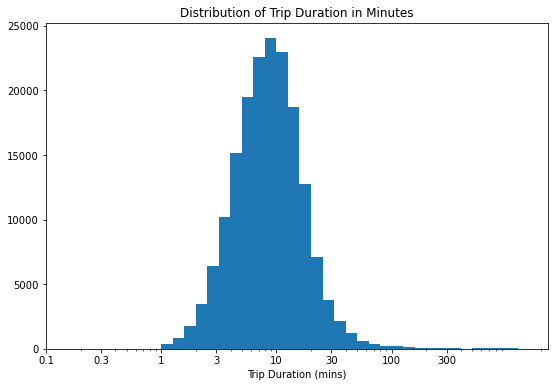

In [16]:
# 1. What is the distribution for trip duration (duration_min)?

#Set figure size
plt.figure(figsize = [9, 6])

# plot a histogram of the distribution, limit the x axis and select appropriate bin size
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(bike_data['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data = bike_data, x = 'duration_min', bins = bins)
plt.xscale("log")
plt.xticks(ticks, labels)
plt.xlabel("Trip Duration (mins)")
plt.title("Distribution of Trip Duration in Minutes")
plt.show();


> The trip duration distribution appears unimodal, with the peak being at 10-15 minutes. However, there are a couple of trips that were as long as 80 minutes.

In [17]:
#2. What is the distribution of gender(member_gender)?
#Define a function to plot horizontal bar graphs
def binti(x, h, xlabel, ylabel, title):
    ax = plt.subplot(1,1,1)
    ax.bar(x, h),
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel),
    ax.set_title(title)
    plt.show()
    
gender = bike_data["member_gender"].value_counts().index
values = bike_data["member_gender"].value_counts().to_list()

#Set figure size
plt.figure(figsize = (8,5))

#Plot a horizontal bar graph for the ratings to see their counts using the defined function
binti(gender, values, "Gender of the Bike Users", "Count per gender", "Distribution of Bike Users by Gender");

> It appears that more males than females, by triple, utilized Ford GoBike system.The gender classified as other used the bikes even less.

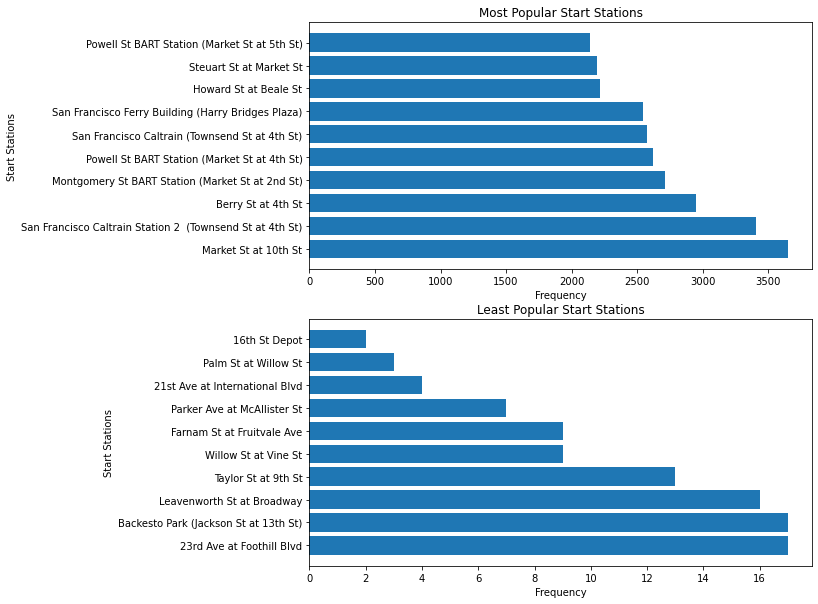

In [18]:
# Q3. What are the 10 most and least popular start stations(start_station_name)?
# set a larger figure size for subplots
plt.figure(figsize = [9, 10]) 

# first horizontal bar graph
# 2 row, 1 cols, subplot 1
plt.subplot(2, 1, 1) 
start_station = bike_data["start_station_name"].value_counts().head(10).index
total = bike_data["start_station_name"].value_counts().head(10).to_list()

#Plot horizontal bar graph
plt.barh(start_station, total)
plt.xlabel("Frequency")
plt.ylabel("Start Stations")
plt.title("Most Popular Start Stations");

# second horizontal bar graph
plt.subplot(2, 1, 2) # 2 row, 1 col, subplot 2
start_station = bike_data["start_station_name"].value_counts().tail(10).index
total = bike_data["start_station_name"].value_counts().tail(10).to_list()

#Plot horizontal bar graph. Use the log scale to get a better view of the data
plt.barh(start_station, total)
plt.xlabel("Frequency")
plt.ylabel("Start Stations")
plt.title("Least Popular Start Stations");

> The most popular start station was Market St at 10th St with over 3500 rides. The top 10 most popular start stations contributed over 2000 rides each. In contrast, the 10 least popular start stations had less than 20 rides each. The least popular start station is 16th St Depot.

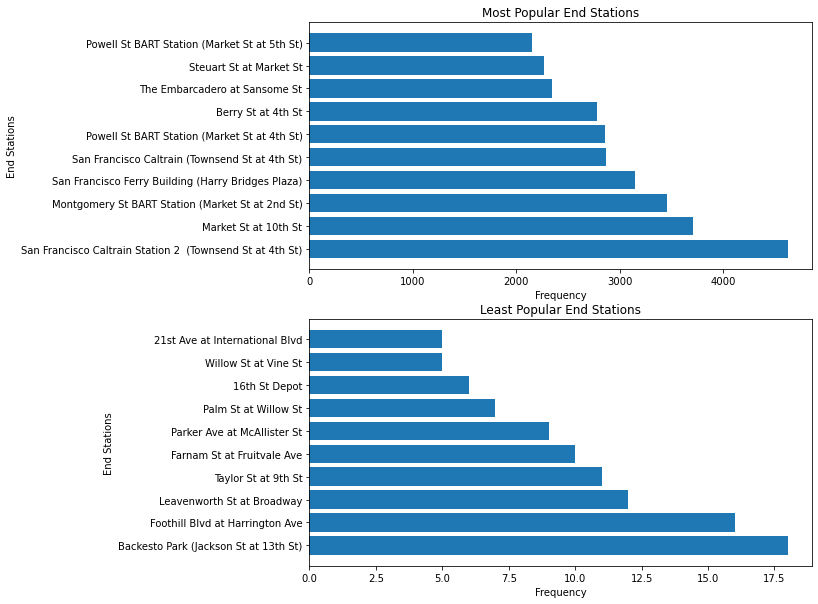

In [19]:
# Q4. What are the 10 most and least popular end stations(end_station_name)?

# set a larger figure size for subplots
plt.figure(figsize = [9, 10]) 

# first horizontal bar graph
# 2 row, 1 cols, subplot 1
plt.subplot(2, 1, 1) 
end_station = bike_data["end_station_name"].value_counts().head(10).index
totale = bike_data["end_station_name"].value_counts().head(10).to_list()

#Plot horizontal bar graph
plt.barh(end_station, totale)
plt.xlabel("Frequency")
plt.ylabel("End Stations")
plt.title("Most Popular End Stations");

# second horizontal bar graph
plt.subplot(2, 1, 2) # 2 row, 1 col, subplot 2
end_station = bike_data["end_station_name"].value_counts().tail(10).index
totale = bike_data["end_station_name"].value_counts().tail(10).to_list()

#Plot horizontal bar graph
plt.barh(end_station, totale)
plt.xlabel("Frequency")
plt.ylabel("End Stations")
plt.title("Least Popular End Stations");

> The most popular end station was San Francisco Caltran Station 2 (Townsend St at 4th St) with over 4000 rides. The top 10 most popular end stations contributed over 2000 rides each. In contrast, the 10 least popular end stations had less than 20 rides each. The least popular end stations are 21st Ave at International Blvd and Willow St at Vine St.

In [20]:
bike_data["user_type"].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [21]:
# Q5. What is the Distribution of the user type(user_type)?
users = bike_data["user_type"].value_counts().index
counts = bike_data["user_type"].value_counts().to_list()

#Set figure size
plt.figure(figsize = (8,5))

binti(users, counts, "User Type", "Count per User Type", "Distribution of Bike Users by Type")

> More than 140,000 of the rides were rented/ booked by Ford GoBike subscribers. Walk-in customers accounted for less than 20,000 rides. This provides an opportunity to convert them into subscribers.

In [22]:
#6. What is the distribution of the ages?
# First, calculate age of each user and store it in a column
def calculate_age(born):
    today = date.today()
    return today.year - born

bike_data['age'] = bike_data.member_birth_year.map(calculate_age)

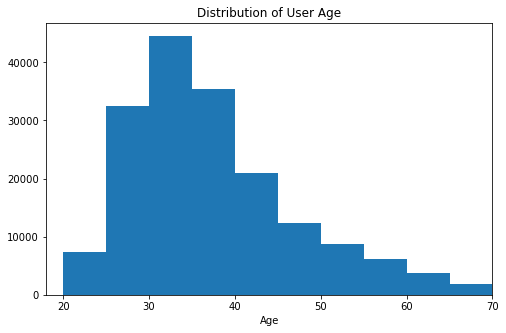

In [23]:
# plot distribution of age
plt.figure(figsize = [8, 5])

binsize = 5
bins = np.arange(0, bike_data['age'].max()+binsize, binsize)

plt.hist(data = bike_data, x = 'age', bins = bins)
plt.xlim(18, 70)
plt.xlabel('Age')
plt.title('Distribution of User Age');

> The age distribution of the bike users in this dataset is unimodal and slightly skewed to the right. Majority of the rides were booked by people between the age of 25 and 45.

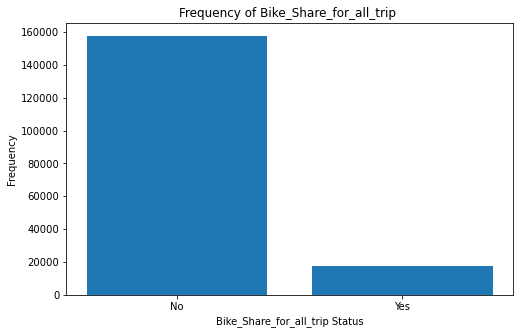

In [24]:
# Q7. Did riders use bike_share_for_all_trip for their rides?
# plot distribution of bike_share_for_all

shared = bike_data["bike_share_for_all_trip"].value_counts().index
sums = bike_data["bike_share_for_all_trip"].value_counts().to_list()

plt.figure(figsize = [8, 5])

binti(shared, sums, "Bike_Share_for_all_trip Status", "Frequency", "Frequency of Bike_Share_for_all_trip ")

> Over 150,000 rides did not use the bike_share_for_all_trip option compared to just under 20,000 who did. This feature might require additional investigation to gauge its effectiveness.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?



> The distributions of the variables were what I eexpected for the most part. However, the bike_share_for_all_trip was a little surprising given that I expected the rides, most of which were booked by subscribers, to utilize the option more than walk-in customers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Of the features investigated, I performed an operation on duration_sec by converting it into minutes. This is because I found it easier to work with given that there were outliers in the dataset. For instance, the maximum trip duration in seconds was 85444. Converting this to minutes makes it easier to fathom.
> I also extracted the age of the users from their birth year by substracting it from today's date. 

## Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in my
data to further understand which variables affect the trip duration.

In [25]:
#1. What is the relationship between the duration and age
# Look at descriptive statistics of the two numerical variables
bike_data["duration_min"].describe(), bike_data["age"].describe()

(count    174952.000000
 mean         11.733379
 std          27.370082
 min           1.016667
 25%           5.383333
 50%           8.500000
 75%          13.150000
 max        1409.133333
 Name: duration_min, dtype: float64,
 count    174952.000000
 mean         37.196865
 std          10.118731
 min          21.000000
 25%          30.000000
 50%          35.000000
 75%          42.000000
 max         144.000000
 Name: age, dtype: float64)

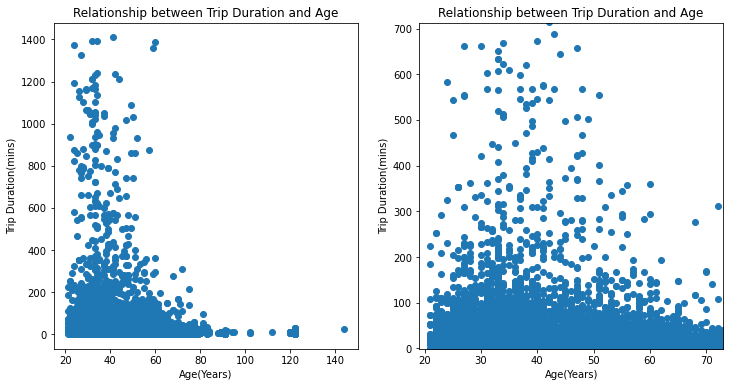

In [26]:
# Plot a scatter plot of the relationship
plt.figure(figsize = (12,6))

plt.subplot(1,2,1) #all the points including outliers
plt.scatter(bike_data["age"],bike_data["duration_min"])
plt.xlabel("Age(Years)")
plt.ylabel("Trip Duration(mins)")
plt.title("Relationship between Trip Duration and Age");

plt.subplot(1,2,2)# subset age to between 19 and 73 and duration to between 19 and 73 to focus on the data
plt.scatter(bike_data["age"],bike_data["duration_min"])
plt.xlim(19,73)
plt.ylim(-1,713)
plt.xlabel("Age(Years)")
plt.ylabel("Trip Duration(mins)")
plt.title("Relationship between Trip Duration and Age");

> From subplot 1, there seems to be a negative relationship between the trip duration and age in that as age progresses, the trip duration reduces. Also, no trips were made by anyone below the age of 20. This might be due to a minimum age requirement to ride/ rent the bikes. A few trips were made by people above the age of 80. It might be interesting to know the occupations of the riders and whether college students use the bikes.

> Focusing on the bulk of the datapoints in subplot 2, the earlier observations hold. However, it is clearer now that all ages tend to ride the bikes for up to 150 minutes. 

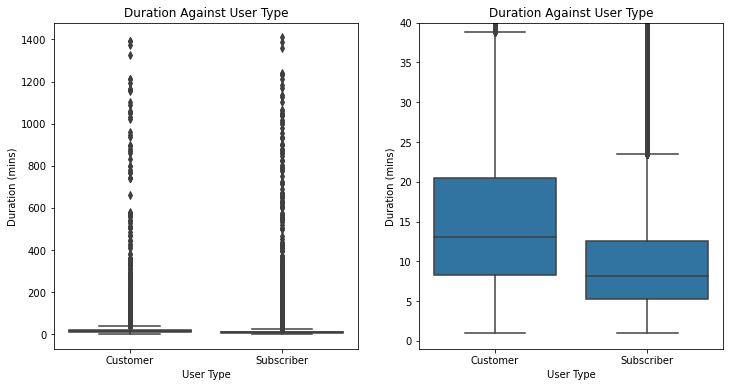

In [27]:
#2. What is the duration vs user type
# plot a boxplot showing relationship between duration and user type 

#Set figure size
plt.figure(figsize = (12,6))

base_color = sns.color_palette()[0]

plt.subplot(1,2,1) # all the datapoints

sns.boxplot(data=bike_data, x="user_type", y="duration_min", color=base_color)
plt.xlabel("User Type")
plt.ylabel("Duration (mins)")
plt.title("Duration Against User Type");

plt.subplot(1,2,2) #limit the duration in minutes for better visibility
sns.boxplot(data=bike_data, x="user_type", y="duration_min", color=base_color)
plt.ylim(-1,40)
plt.xlabel("User Type")
plt.ylabel("Duration (mins)")
plt.title("Duration Against User Type");

> Subplot 1 does not give enough information and is hard to decipher necessitating the need to limit the trip duration.

> Subplot 2 shows that customers tend to ride their bikes for longer than the subscribers. This is interesting, since the number of trips by subscribers was 8 times the number of customers. A plausible explanation is that the customers might be foreigners/ tourists on a sightseeing mission whereas for the subscribers, the Ford GoBike system is a means of transportation in their daily lives.

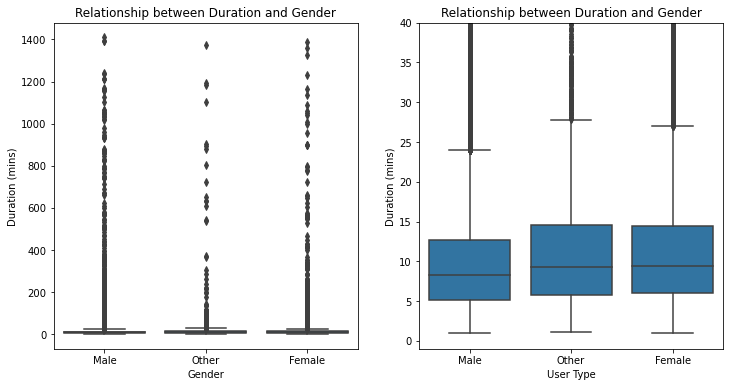

In [28]:
#2. What is the relationship between gender and duration
# plot a boxplot showing relationship between duration and gender 

#Set figure size
plt.figure(figsize = (12,6))

base_color = sns.color_palette()[0]

plt.subplot(1,2,1)#all the datapoints

sns.boxplot(data=bike_data, x="member_gender", y="duration_min", color=base_color)
plt.xlabel("Gender")
plt.ylabel("Duration (mins)")
plt.title("Relationship between Duration and Gender");

plt.subplot(1,2,2) #limit the duration in minutes for better visibility
sns.boxplot(data=bike_data, x="member_gender", y="duration_min", color=base_color)
plt.ylim(-1, 40)
plt.xlabel("User Type")
plt.ylabel("Duration (mins)")
plt.title("Relationship between Duration and Gender");

> From suplot 2, males appear to ride for the least amount in minutes compared to females and other. Given that the rides by male users was triple that by female users, this visualization was a bit surprising. Further data collection is necessary to find out the reason. A possible assumption might be that female users that utilized the Ford GoBike system were cyclists. It might be hard to draw trip duration conclusions about the third gender- other.

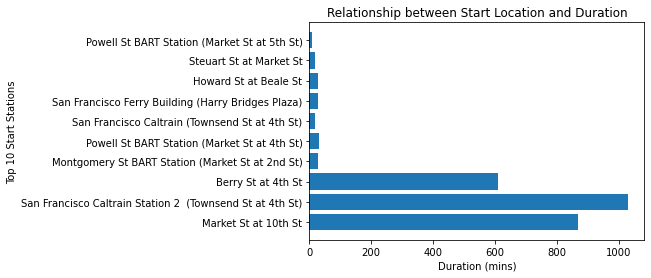

In [29]:
#Q3. Does the start station influence the trip duration?
#Plot a horizontal bar graph to analyze this relationship

plt.barh(bike_data["start_station_name"].value_counts().head(10).index, bike_data["duration_min"].head(10))
plt.xlabel("Duration (mins)")
plt.ylabel("Top 10 Start Stations")
plt.title("Relationship between Start Location and Duration");

> The start location does not seem to affect the trip duration by much. Some of the most popular start stations such as Market St at 10th had trips up to 1000 minutes while others such as Powell St Bart Station(Market St at 5th St) had less than 30 minutes.

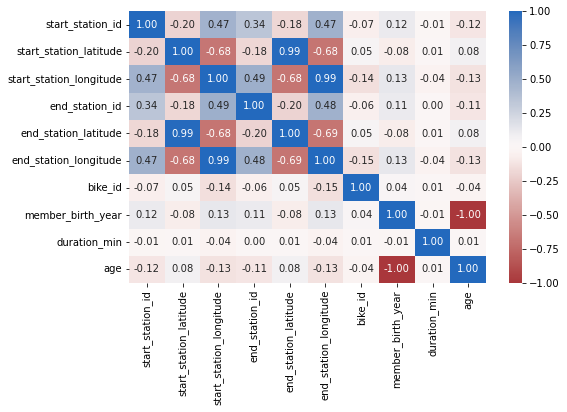

In [30]:
#Q1. What is the correlation of the numerical variables in the dataset?
#Plot a heatmap
plt.figure(figsize = [8, 5])
sns.heatmap(bike_data.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

> This heatmap visualizes the realtionship between the numerical variables. I was mostly interested in the age, duration_min which do not appear to have a strong correlation.

<Figure size 864x432 with 0 Axes>

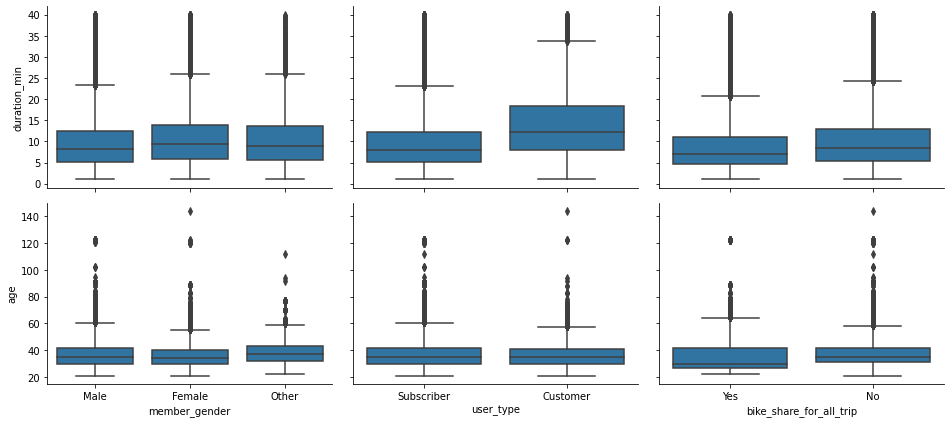

In [31]:
# Q2. How are the trip durations and age influeced by gender, user type and bike_share_for_all?
plt.figure(figsize = (12,6))

trip_dur = bike_data.query("duration_min < 40") #plot only trips shorter than 40 minutes

g = sns.PairGrid(data = trip_dur, x_vars = ["member_gender", "user_type", "bike_share_for_all_trip"],
                y_vars = ["duration_min", "age"], height = 3, aspect = 1.5)
g.map(sns.boxplot, color=base_color);

> From the pairgrid, the bike trips were mostly by users between the ages of 20 and 45. Of these, more were male than female and other in terms of gender. There were also almost a similar number of customers and subscribers. However, more females above the age of 70 rode the bikes than the other two genders.

> This plot also confrims the earlier relationships between trip duration and the three variables- gender, user_type and bike_share_for_all_trip. Female users rode the bikes for longer than the other genders. Customers also had longer bike trips than subscribers. Bike_share_for_all_trip rides lasted shorter than the others.

## Multivariate Exploration

In this section, I will analyse the relationships between multiple various features especially how they influence the trip duration. 

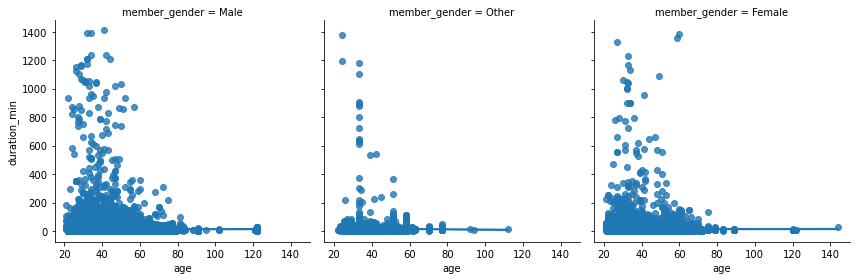

In [32]:
# Plot trip duration by age, subset using the gender
g = sns.FacetGrid(data = bike_data, col = "member_gender", height = 4.0,
                margin_titles = True)
g.map(sns.regplot, "age", "duration_min");

> From the plot, male users used Ford GoBike more than female and other users. However, the age range of the bike users remained the same for all three genders. 

## Conclusions
1. The average bike trip duration for the Ford GoBike system was 10 minutes. Subscribers took way more bike trips than walk-in customers. More males than females and other took the trips over the dataset period.
2. The start location did not seem to affect the trip duration by much as more popular stations had a high trip average of up to 1000 minutes per trip while others had less than 20 minutes.
3. Customers(walk-ins) spent more time per trip than Ford GoBike subscribers.
4. Most users did not utilize the bike_share_for_all feature.
5. Overall, the majority of bikes were hired by users aged 25 to 45.


In [33]:
# save all changes made to a new csv
bike_data.to_csv('bike_data_clean.csv', 
                 index=False, encoding = 'utf-8')